# Analyse exploratoire

In [89]:
#Librairies utilisées
library(readr)
library(GGally)
library(vcd)

#récupération des données
data <- read_csv("./Data/DataEnergy.csv")

Warning message:
"package 'vcd' was built under R version 4.0.3"
Loading required package: grid

Parsed with column specification:
cols(
  Relative.compactness = col_double(),
  Surface.area = col_double(),
  Wall.area = col_double(),
  Roof.area = col_double(),
  Overall.height = col_double(),
  orientation = col_character(),
  Glazing.area = col_double(),
  Glazing.area.distr = col_double(),
  Energy = col_double(),
  Energy.efficiency = col_character()
)



#### analyse de la forme

In [90]:
#Apercu des données
head(data)

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

Transformation des données qualitatives en facteurs :

In [91]:
data$orientation=as.factor(data$orientation)
data$Glazing.area.distr=as.factor(data$Glazing.area.distr)
data$Energy.efficiency=as.factor(data$Energy.efficiency)

#### Analyse statistique

In [92]:
summary(data)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
                                                                     
 Overall.height orientation  Glazing.area      Glazing.area.distr
 Min.   :3.50   East :192   Min.   :-0.02401   0: 48             
 1st Qu.:3.50   North:192   1st Qu.: 0.10306   1:144             
 Median :5.25   South:192   Median : 0.24752   2:144             
 Mean   :5.25   West :192   Mean   : 0.23435   3:144             
 3rd Qu.:7.00               3rd Qu.: 0.39119   4:144             
 Max.   :7.00               Max.   : 0.42702

#### Distribution des variables quantitatives

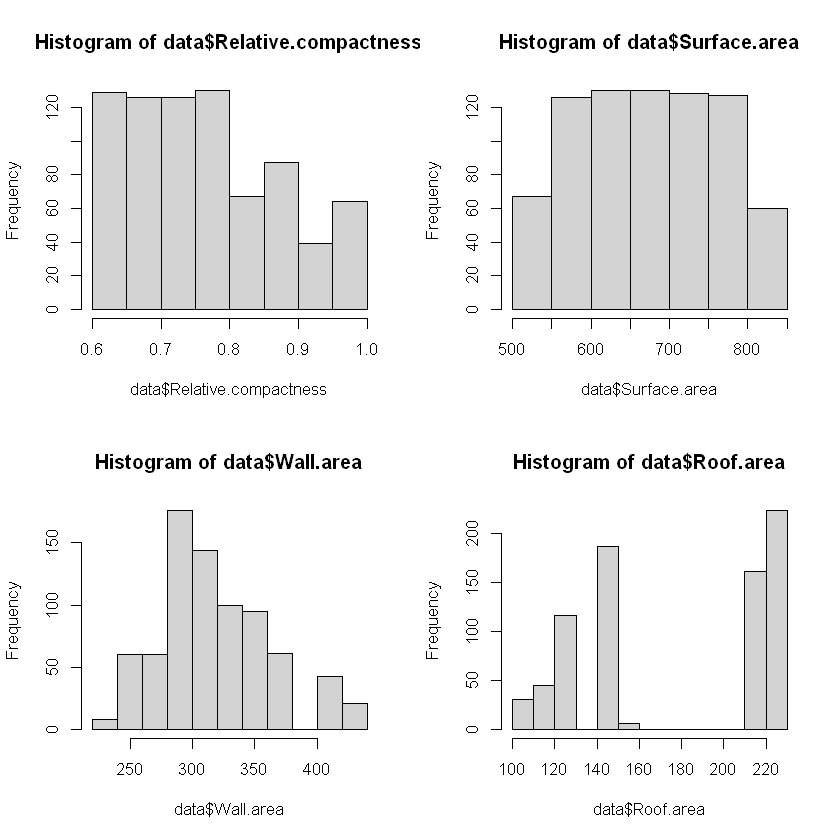

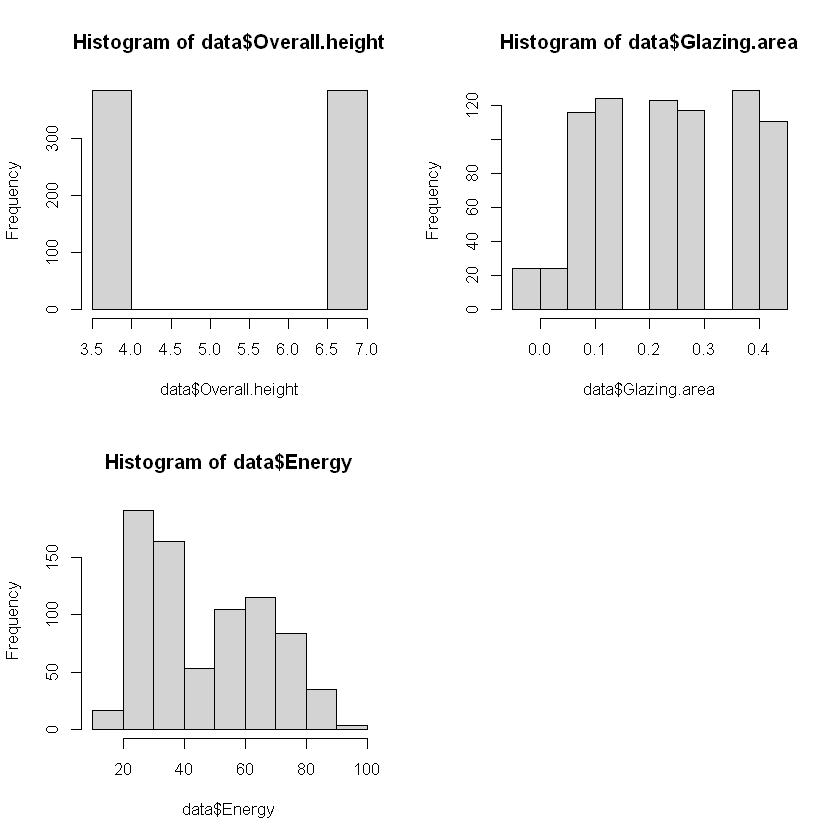

In [96]:
par(mfrow = c(2, 2))
options(repr.plot.width = 7, repr.plot.height = 7)

hist(data$Relative.compactness)
hist(data$Surface.area)
hist(data$Wall.area)
hist(data$Roof.area)
hist(data$Overall.height)
hist(data$Glazing.area)
hist(data$Energy)

#### Corrélations

Warning message in ggcorr(data):
"data in column(s) 'orientation', 'Glazing.area.distr', 'Energy.efficiency' are not numeric and were ignored"


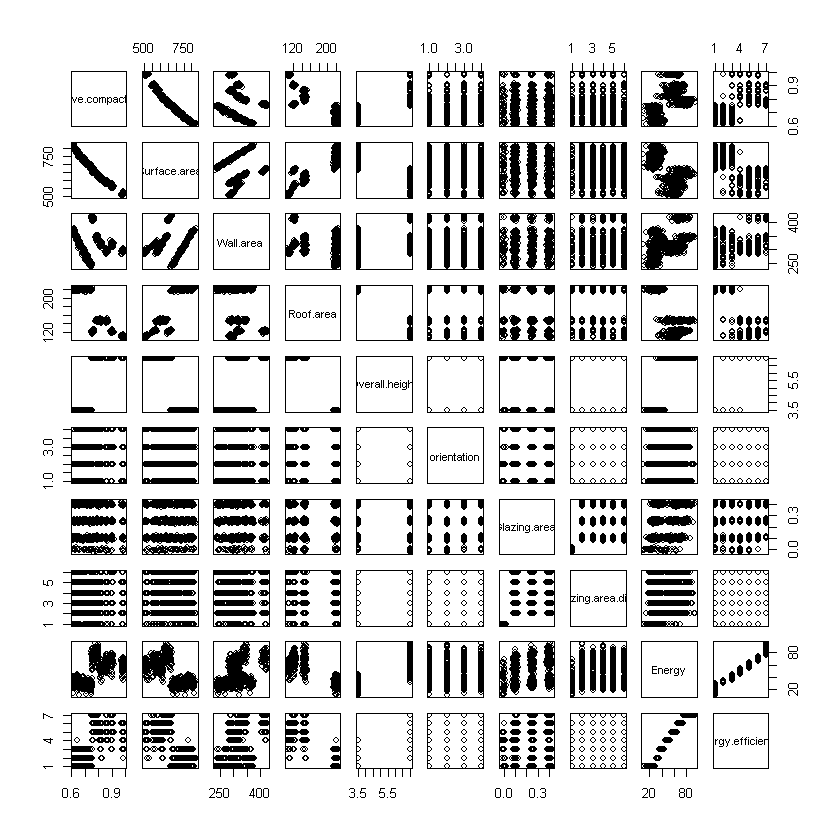

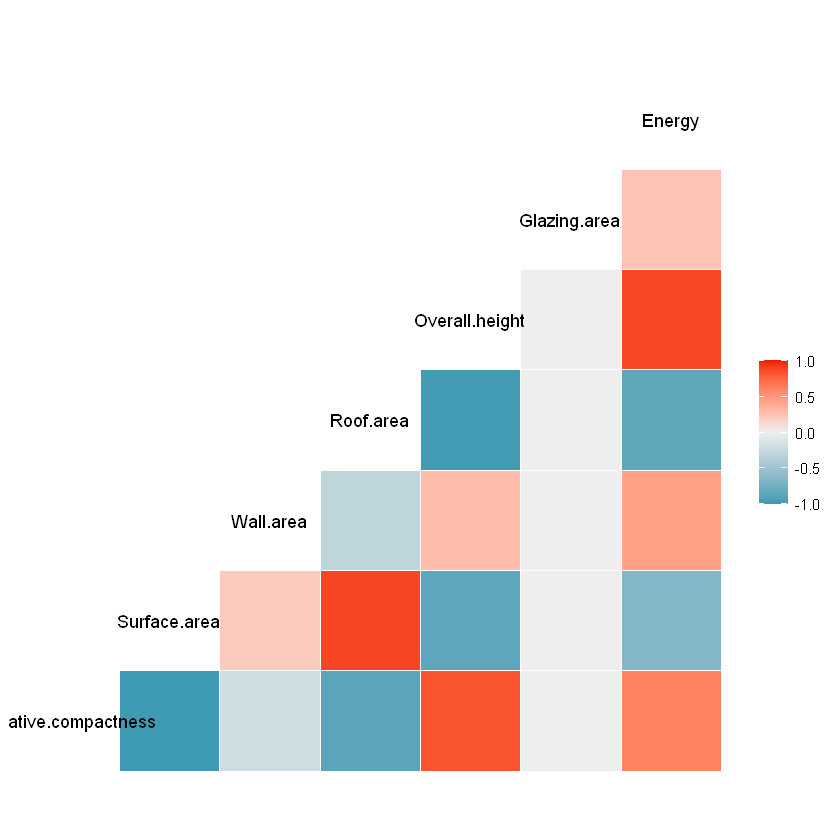

In [6]:
options(repr.plot.width = 7, repr.plot.height = 7)
pairs(data[,1:10])
ggcorr(data)

#### ACP

In [28]:
library("FactoMineR")
library("factoextra")

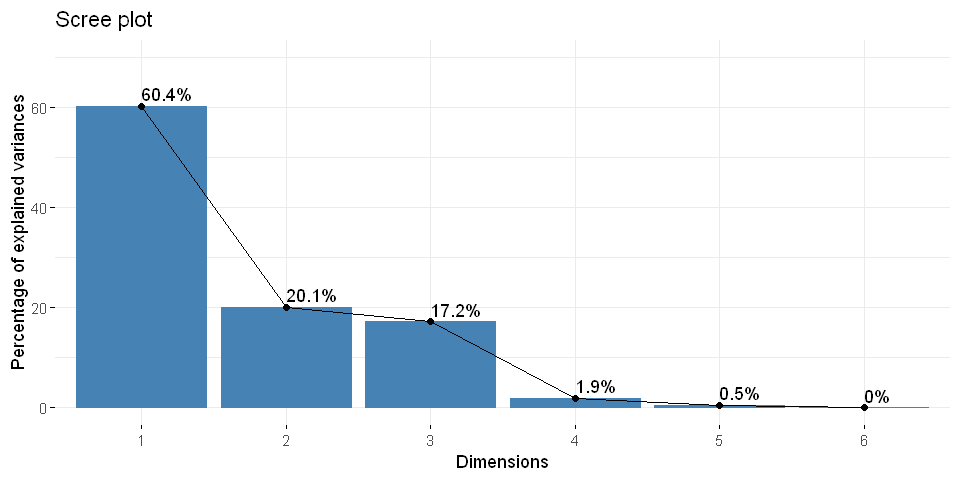

In [61]:
acp <- PCA(data[, c(1:5, 7, 9)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, ncp = 7)
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))

fviz_eig(acp, addlabels = TRUE, ylim = c(0, 70))

3 composantes sont nécessaires pour garder une variance > 95%

##### Cercle de correlation des variables :

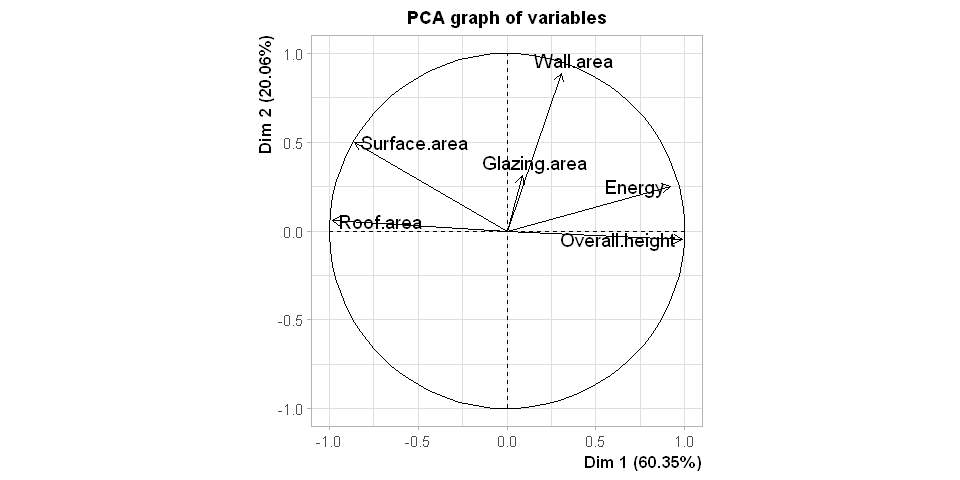

In [30]:
plot(acp, choix = "varcor")

##### Visualisation des individus :

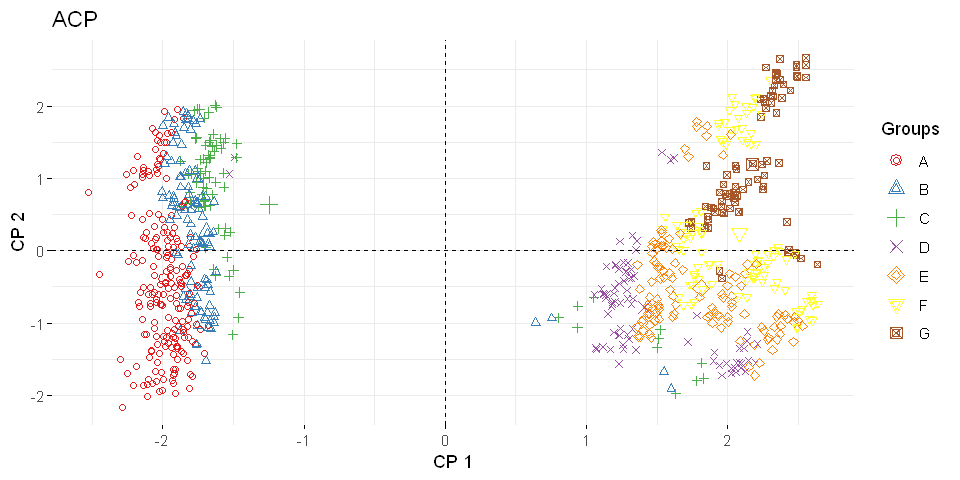

In [51]:
#Graphique des individus en fonction de leur classe d'énergie
fviz_pca_ind(acp, 
             label="none", 
             habillage=data$Energy.efficiency, 
             palette="Set1") + labs(title = "ACP", x="CP 1", y="CP 2")

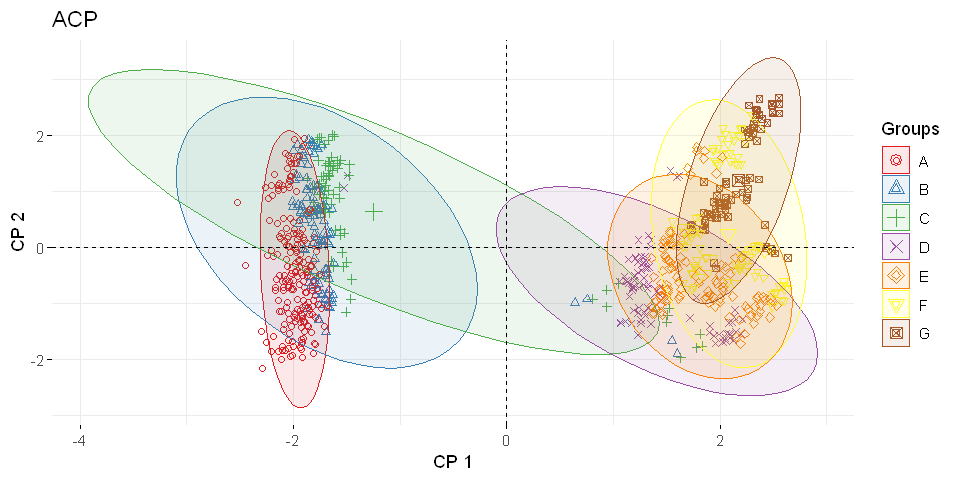

In [56]:
fviz_pca_ind(acp, 
             label="none", 
             habillage=data$Energy.efficiency, 
             addEllipses=TRUE, 
             palette="Set1") + labs(title = "ACP", x="CP 1", y="CP 2")

#### Clustering

Méthode utilisée : K-means

In [69]:
library(cluster)
library(NbClust)

Warning message:
"package 'NbClust' was built under R version 4.0.3"


Recherche du nombre optimal de cluster par méthode de Elbow

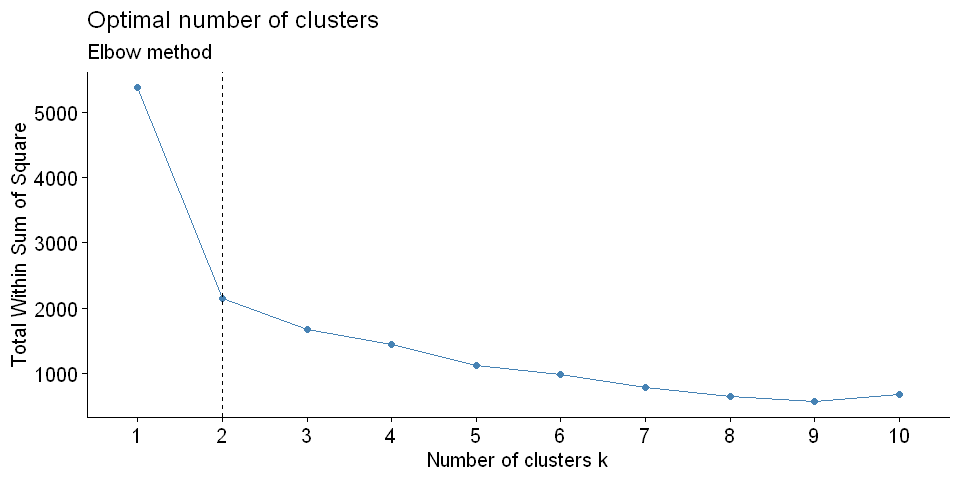

In [75]:
fviz_nbclust(scale(data[, c(1:5,7,9)]), kmeans, method = "wss") +
  geom_vline(xintercept = 2, linetype = 2) + # add line for better visualisation
  labs(subtitle = "Elbow method") # add subtitle

Visualisation des clusters (sur 2 composantes principales)

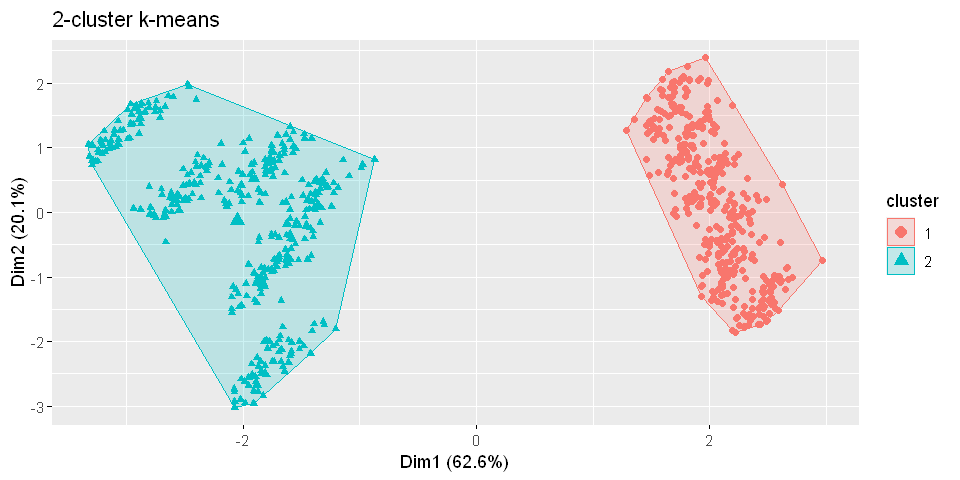

In [82]:
km.res<-kmeans(scale(data[, c(1:5,7,9)]), 2)
fviz_cluster(km.res, data=scale(data[, c(1:5,7,9)]), labelsize=0, main="2-cluster k-means")

Essai du k-means avec 7 cetroïdes (7 classes d'énergie du dataset)

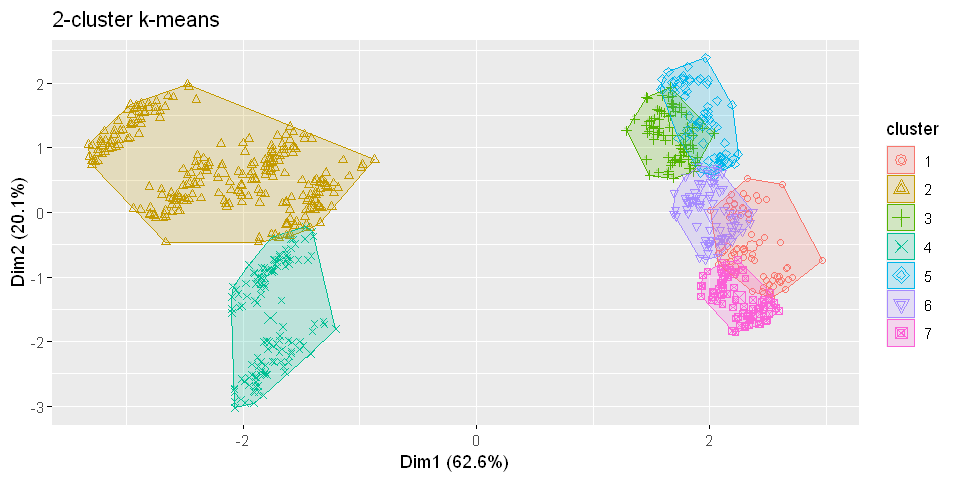

In [84]:
km.res<-kmeans(scale(data[, c(1:5,7,9)]), 7)
fviz_cluster(km.res, data=scale(data[, c(1:5,7,9)]), labelsize=0, main="2-cluster k-means")

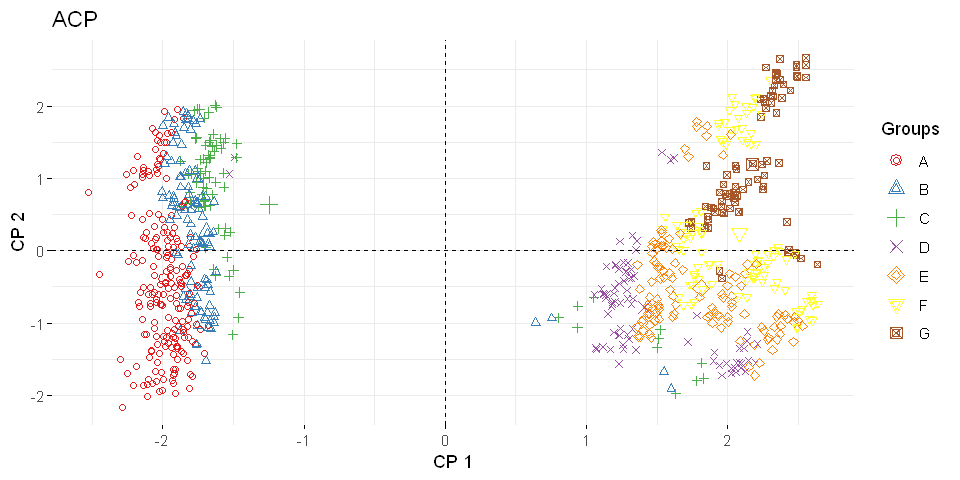

In [83]:
fviz_pca_ind(acp, 
             label="none", 
             habillage=data$Energy.efficiency, 
             palette="Set1") + labs(title = "ACP", x="CP 1", y="CP 2")

On peut observer que l'approche de clustering k-means ne divise pas les données de la même manière. Elle n'est pas pertinente pour notre problème.